### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data from the path
# lapatinib
pop_l, g2_l, g1_l, g1_0_l, g2_0_l = get_data(joinpath("..", "data", "lap.csv"),
                                   joinpath("..", "data", "lap_pop.csv"))
# remove peaks from the raw data
for i in 1:8
    pop_l[:, i] = remove_peaks(pop_l[:, i])
    g2_l[:, i] = remove_peaks(g2_l[:, i])
    g1_l[:, i] = remove_peaks(g1_l[:, i])
end
# doxorubicin
pop_d, g2_d, g1_d, g1_0_d, g2_0_d = get_data(joinpath("..", "data", "lap.csv"),
                                   joinpath("..", "data", "lap_pop.csv"))
# remove peaks from the raw data
for i in 1:8
    pop_d[:, i] = remove_peaks(pop_d[:, i])
    g2_d[:, i] = remove_peaks(g2_d[:, i])
    g1_d[:, i] = remove_peaks(g1_d[:, i])
end

# gemcitabine
pop_g, g2_g, g1_g, g1_0_g, g2_0_g = get_data(joinpath("..", "data", "lap.csv"),
                                   joinpath("..", "data", "lap_pop.csv"))
# remove peaks from the raw data
for i in 1:8
    pop_g[:, i] = remove_peaks(pop_g[:, i])
    g2_g[:, i] = remove_peaks(g2_g[:, i])
    g1_g[:, i] = remove_peaks(g1_g[:, i])
end

# paclitaxel
pop_p, g2_p, g1_p, g1_0_p, g2_0_p = get_data(joinpath("..", "data", "lap.csv"),
                                   joinpath("..", "data", "lap_pop.csv"))
# remove peaks from the raw data
for i in 1:8
    pop_p[:, i] = remove_peaks(pop_p[:, i])
    g2_p[:, i] = remove_peaks(g2_p[:, i])
    g1_p[:, i] = remove_peaks(g1_p[:, i])
end
# lapatinib: 1
# doxorubicin: 2
# gemcitabine: 3
# paclitaxel: 4

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:30
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/importData.jl:30
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[1]:11
└ @ Core ./In[1]:11
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[1]:20
└ @ Core ./In[1]:20
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[1]:30
└ @ Core ./In[1]:30
┌ Warning: `setind

### Estimate 

In [2]:
# initial guess
initial_guess  = [0.02798, 0.025502, 21.3481, 10.2881, 0.0001, 0.0001]

# bounds 
lower_bnd = [-6.0, -6.0, 2.0, 2.0, -8.0, -8.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]
bound = collect(zip(lower_bnd, upper_bnd))

# max number of steps
maxSteps = 1e4
parameters = zeros(4, 6, 8)
for j in 1:8
    parameters[1, :, j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, bound, maxSteps)
    parameters[2, :, j] = optimization(g1_d, g2_d, g1_0_d, g2_0_d, initial_guess, j, bound, maxSteps)
    parameters[3, :, j] = optimization(g1_g, g2_g, g1_0_g, g2_0_g, initial_guess, j, bound, maxSteps)
    parameters[4, :, j] = optimization(g1_p, g2_p, g1_0_p, g2_0_p, initial_guess, j, bound, maxSteps)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 43.31 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 230.94
Function evals per second = 233.09
Improvements/step = 0.18690
Total function evaluations = 10094


Best candidate found: [-2.64601, -3.29866, 2.01126, 2.0001, -7.93442, -4.50607]

Fitness: 1825.770001324

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 43.35 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 230.70
Function evals per second = 233.65
Improvements/step = 0.19010
Total function evaluations = 10129


Best candida

In [3]:
parameters

4×6×8 Array{Float64,3}:
[:, :, 1] =
 0.0709338  0.0369326  7.47273  7.38981  0.000358198  0.0110418
 0.0713217  0.0371786  7.47483  7.40421  0.000471992  0.011143 
 0.0705264  0.0369666  7.47119  7.39002  0.000423481  0.0109926
 0.0714151  0.0372796  7.4748   7.39099  0.000349825  0.0113099

[:, :, 2] =
 0.0878791  0.0524055  7.40432  7.42704  0.00475311   0.021271 
 0.0885757  0.0516252  7.39275  7.41624  0.00319142   0.0221923
 0.087132   0.0497374  7.4005   7.62738  0.000685581  0.0224726
 0.0874354  0.0509714  7.39773  7.47616  0.00295041   0.0217643

[:, :, 3] =
 0.0949127  0.0666668  7.44128  7.40016  0.0190283   0.0173702
 0.0995702  0.0627787  7.39159  7.41863  0.00785146  0.0250017
 0.0995046  0.0611068  7.38955  7.4069   0.00486512  0.0264107
 0.0927023  0.0663847  7.39162  7.47481  0.0199442   0.016078 

[:, :, 4] =
 0.0551718  0.0479105  24.7827  7.38932  0.0120982   0.00785849
 0.0554349  0.0478923  25.1214  7.3904   0.011696    0.00819928
 0.0568966  0.0478483  25.0804  7

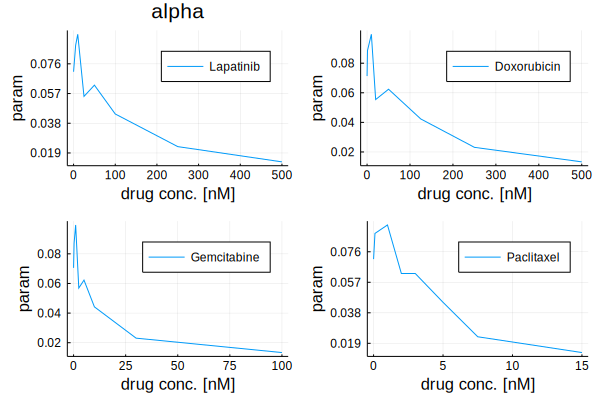

In [6]:
using Plots;

param_lap_dde = CSV.read(joinpath("..", "data", "params_lap_DDE.csv"))
conc_l = [param_lap_dde[8,col] for col in 2:9]
param_dox_dde = CSV.read(joinpath("..", "data", "params_dox_DDE.csv"))
conc_d = [param_dox_dde[8,col] for col in 2:9]
param_gem_dde = CSV.read(joinpath("..", "data", "params_gem_DDE.csv"))
conc_g = [param_gem_dde[8,col] for col in 2:9]
param_tax_dde = CSV.read(joinpath("..", "data", "params_taxol1_DDE.csv"))
conc_p = [param_tax_dde[8,col] for col in 2:9]

p1 = plot(conc_l, parameters[1,1,:], label = "Lapatinib", title = "alpha", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[1,1,:])/5 ,digits = 3):maximum(parameters[1,1,:]))
p2 = plot(conc_d, parameters[2,1,:], label = "Doxorubicin", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[2,1,:])/5, digits = 3):maximum(parameters[2,1,:]))
p3 = plot(conc_g, parameters[3,1,:], label = "Gemcitabine", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[3,1,:])/5, digits = 3):maximum(parameters[3,1,:]))
p4 = plot(conc_p, parameters[4,1,:], label = "Paclitaxel", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[4,1,:])/5, digits = 3):maximum(parameters[4,1,:]))
plot(p1, p2, p3, p4, dpi = 100)

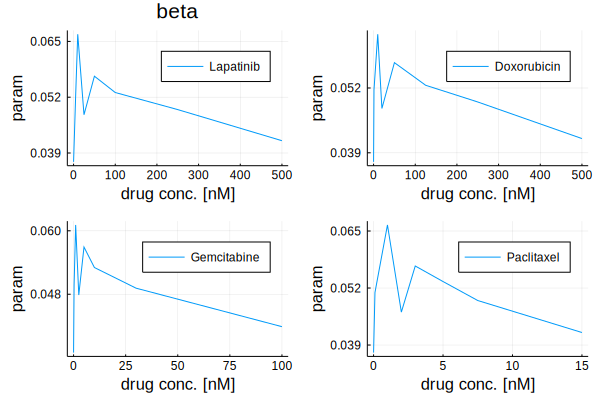

In [7]:
param_lap_dde = CSV.read(joinpath("..", "data", "params_lap_DDE.csv"))
conc_l = [param_lap_dde[8,col] for col in 2:9]
param_dox_dde = CSV.read(joinpath("..", "data", "params_dox_DDE.csv"))
conc_d = [param_dox_dde[8,col] for col in 2:9]
param_gem_dde = CSV.read(joinpath("..", "data", "params_gem_DDE.csv"))
conc_g = [param_gem_dde[8,col] for col in 2:9]
param_tax_dde = CSV.read(joinpath("..", "data", "params_taxol1_DDE.csv"))
conc_p = [param_tax_dde[8,col] for col in 2:9]

p1 = plot(conc_l, parameters[1,2,:], label = "Lapatinib", title = "beta", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[1,2,:])/5 ,digits = 3):maximum(parameters[1,2,:]))
p2 = plot(conc_d, parameters[2,2,:], label = "Doxorubicin", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[2,2,:])/5, digits = 3):maximum(parameters[2,2,:]))
p3 = plot(conc_g, parameters[3,2,:], label = "Gemcitabine", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[3,2,:])/5, digits = 3):maximum(parameters[3,2,:]))
p4 = plot(conc_p, parameters[4,2,:], label = "Paclitaxel", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[4,2,:])/5, digits = 3):maximum(parameters[4,2,:]))
plot(p1, p2, p3, p4, dpi = 100)

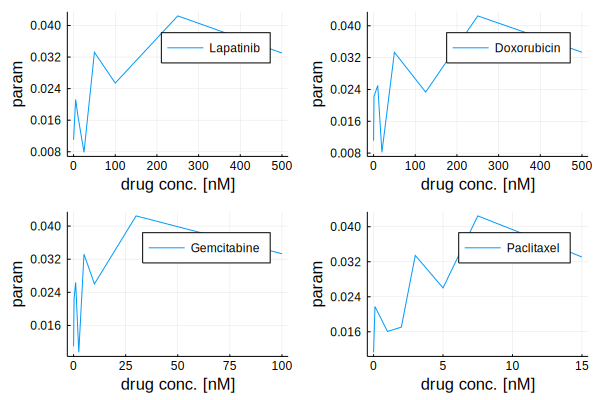

In [12]:
k=6
param_lap_dde = CSV.read(joinpath("..", "data", "params_lap_DDE.csv"))
conc_l = [param_lap_dde[8,col] for col in 2:9]
param_dox_dde = CSV.read(joinpath("..", "data", "params_dox_DDE.csv"))
conc_d = [param_dox_dde[8,col] for col in 2:9]
param_gem_dde = CSV.read(joinpath("..", "data", "params_gem_DDE.csv"))
conc_g = [param_gem_dde[8,col] for col in 2:9]
param_tax_dde = CSV.read(joinpath("..", "data", "params_taxol1_DDE.csv"))
conc_p = [param_tax_dde[8,col] for col in 2:9]

p1 = plot(conc_l, parameters[1,k,:], label = "Lapatinib", title = "", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[1,k,:])/5 ,digits = 3):maximum(parameters[1,k,:]))
p2 = plot(conc_d, parameters[2,k,:], label = "Doxorubicin", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[2,k,:])/5, digits = 3):maximum(parameters[2,k,:]))
p3 = plot(conc_g, parameters[3,k,:], label = "Gemcitabine", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[3,k,:])/5, digits = 3):maximum(parameters[3,k,:]))
p4 = plot(conc_p, parameters[4,k,:], label = "Paclitaxel", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[4,k,:])/5, digits = 3):maximum(parameters[4,k,:]))
plot(p1, p2, p3, p4, dpi = 100)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at plot.jl:32
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/plot.jl:32


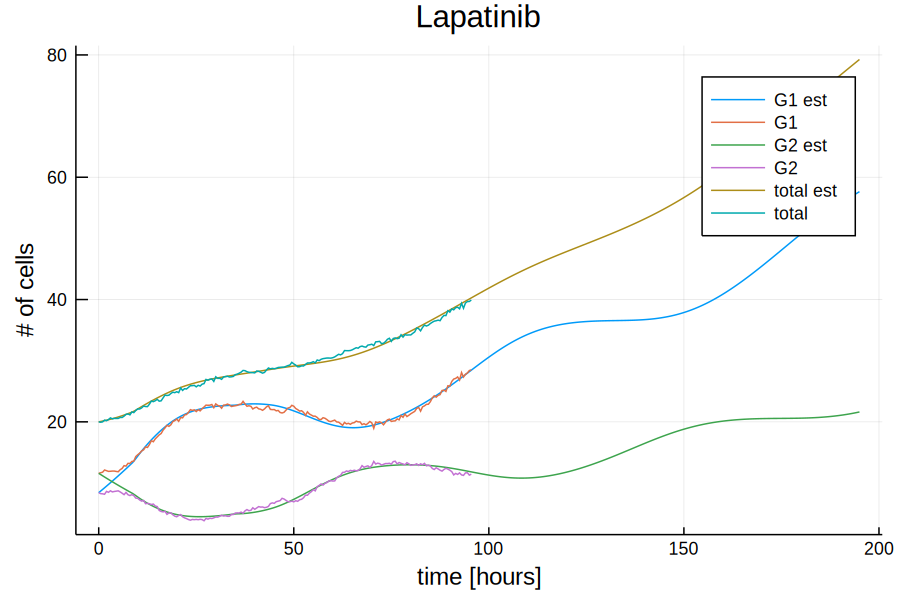

In [13]:
j = 6
plotIt(parameters[1,:, j], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, j, "Lapatinib")